<a href="https://colab.research.google.com/github/janorena/analitica-de-datos/blob/master/Ejercicio_Laboratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jorge Andrés Noreña García - 816543

Consultar el funcionamiento (modelo matemático, función de costo y optimización) de los siguientes algoritmos seg´un su implementación en el paquete Scikit-Learn de Python:
* sklearn.linear model.LinearRegression
* sklearn.linear model.Ridge
* sklearn.linear model.Lasso
* sklearn.linear model.ElasticNet
* sklearn.kernel ridge.KernelRidge (describa los modelos no lineales disponibles).


# 1) sklearn.linear model.LinearRegression

Regresión lineal por mínimos cuadrados ordinarios.
LinearRegression se ajusta a un modelo lineal con coeficientes: $$ w = (w1,…, wp)$$ para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal.

Antes de explicar el método de los mínimos cuadrados para resolver regresiones lineales, tenemos que expandir la notación. Debemos tener en cuenta que normalmente, tendremos muchas variables.
Con una variable, la ecuación para la regresión lineal es:

$$y=wx+b$$

Por conveniencia, vamos a reescribir la ecuación anterior:

$$y = b + wx$$

Cuando tengamos un dato con N variables, llamaremos al dato X. También tenemos que expandir los parámetros W para que cada parámetro vaya con una variable:

$$X = [x_0, x_1, x_2, ..., x_N]$$

$$W = [w_0, w_1, w_2, ..., w_N]$$

Si hacemos que

$$x_0 = 1, w_0 = b$$

nos queda una expresión equivalente a la original. Podemos ver que:

$$y = b + wx = w_0 x_0 + w_1 x_1$$
 
Para el caso general, la ecuación lineal quedaría:

$$y = WX$$

usando el producto matricial. Si tienes la multiplicación de matrices un poco oxidada, la versión intuitiva sería:

$$y = w_0 x_0 + w_1 x_1 + w_2 x_2 + ... + w_N x_N$$

LinearRegressiontomará en su fitmétodo las matrices X, y y almacenará los coeficientesdel modelo lineal en su coef_miembro:

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


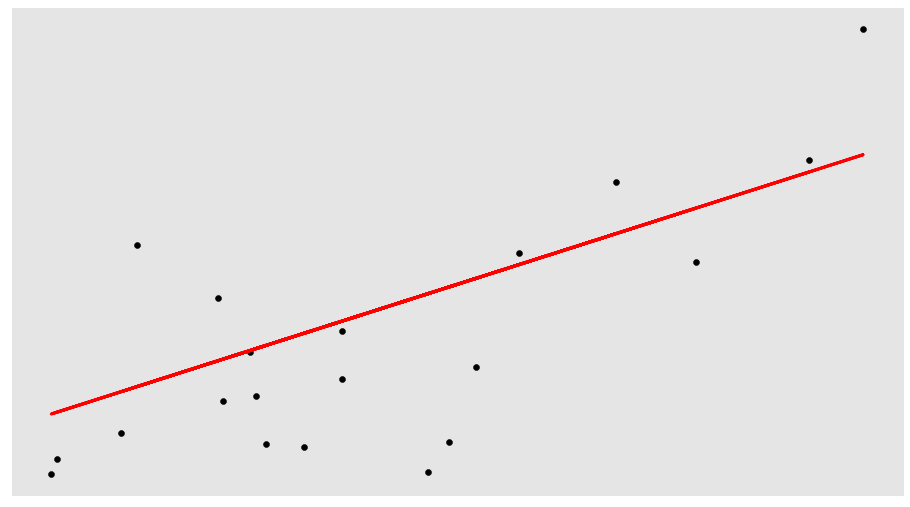

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# 2) sklearn.linear model.Ridge

Ridge regression es similar al ajuste por mínimos cuadrados en cuanto que ambos tratan de minimizar el Residual Sum of Squares (RSS). La diferencia reside en que ridge regression incorpora un término llamado shrinkage penalty que fuerza a que los coeficientes de los predictores tiendan a cero. El efecto de esta penalización está controlada por el parámetro λ. Cuando λ=0 la penalización es nula y los resultados son equivalentes a los obtenidos por mínimos cuadrados, cuando λ=∞ todos los coeficientes son cero, lo que equivale al modelo sin ningún predictor (modelo nulo).

$$∑i=1n(yi−β0−∑j=1pβjxij)2+λ∑j=1pβ2j=RSS+λ∑j=1pβ2j$$

La principal ventaja del ajuste por ridge regression frente al ajuste por mínimos cuadrados es la reducción de varianza. Por lo general, en situaciones en las que la relación entre la variable respuesta y los predictores es aproximadamente lineal, las estimaciones por mínimos cuadrados tienen poco bias pero aún pueden sufrir alta varianza (pequeños cambios en los datos de entrenamiento tienen mucho impacto en el modelo resultante). Este problema se acentúa conforme el número de predictores introducido en el modelo se aproxima al número de observaciones de entrenamiento, llegando al punto en que, si p>n, no es posible ajustar por mínimos cuadrados. Empleando un valor adecuado de λ, identificado mediante cross-validation, el método de ridge regression es capaz de reducir varianza sin apenas aumentar el bias, consiguiendo así un menor error total.

La limitación del método de ajuste por ridge regression en comparación a los métodos de subset selection es que el modelo final va a incluir todos los predictores. Esto es así porque, si bien la penalización empleada fuerza a que los coeficientes tiendan a cero, nunca llegan a ser exactamente cero (solo si λ=∞). Este método consigue minimizar la influencia sobre el modelo de los predictores menos relacionados con la variable respuesta, pero en el modelo final van a seguir apareciendo. Aunque esto no supone un problema para la precisión del modelo, sí lo es para su interpretación.

La Regresión Rigde, también denominada regresión contraída o Tikhonov regularization, regulariza el modelo resultante imponiendo una penalización al tamaño de los coeficientes de la relación lineal entre las características predictivas y la variable objetivo. En este caso, los coeficientes calculados minimizan la suma de los cuadrados de los residuos penalizada al añadir el cuadrado de la norma L2 del vector formado por los coeficientes:

$${ RSS }_{ ridge }=\sum _{ i=1 }^{ n }{ { ({ y }_{ i }-f{ ({ x }_{ i }) }) }^{ 2 } } +\lambda \sum _{ j=1 }^{ p }{ { \beta  }_{ j }^{ 2 } } $$

RSS Ridge
...donde λ es un parámetro que controla el grado de penalización: cuanto mayor éste, los coeficientes serán menores resultando más robustos a la colinealidad. Cuando α es igual a cero, Ridge es equivalente a la regresión lineal.

La norma L2 es equivalente a la distancia Euclidea del vector al centro de coordenadas, por lo que la penalización es proporcional a los cuadrados de los coeficientes. Por poner un ejemplo sencillo, si el vector de coordenadas es (2, 3) -supongamos que estamos trabajando solo con dos características predictivas-, la "norma 2" (L2) de este vector sería la distancia del punto (2, 3) a (0, 0), es decir, la raíz cuadrada de 22 + 32: 3.16 aproximadamente. La penalización sería el cuadrado de este valor: 10 (resultante de sumar los cuadrados de los coeficientes).

Nótese que el término de regularización solo se añade a la función de coste durante el entrenamiento: la evaluación del rendimiento del modelo se realiza considerando solo la función de coste sin regularizar.

In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge


In [ ]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

In [ ]:
alpha = 1

In [ ]:
n, m = X.shape
I = np.identity(m)

In [ ]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha * I), X.T), y)

In [ ]:
w

array([87.37153533])

In [ ]:
coefficients

array(90.34019153)

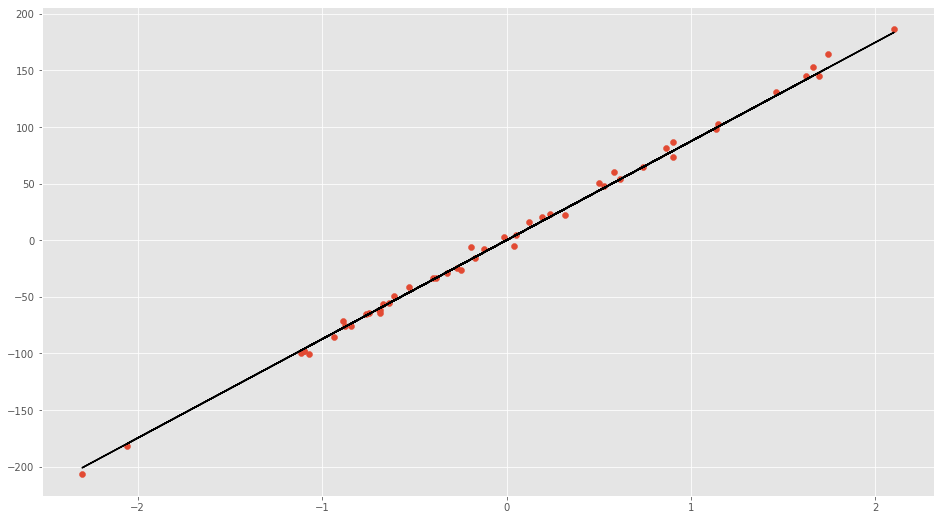

In [ ]:
plt.scatter(X, y)
plt.plot(X, w*X, c='black')

# 3) sklearn.linear model.Lasso

Lasso -del inglés Least Absolute Shrinkage and Selection Operator- es un modelo lineal que penaliza el vector de coeficientes añadiendo su norma L1 (basada en la distancia Manhattan) a la función de coste:

$${ RSS }_{ lasso }=\sum _{ i=1 }^{ n }{ { ({ y }_{ i }-f{ ({ x }_{ i }) }) }^{ 2 } } +\lambda \sum _{ j=1 }^{ p }{ { |\beta  }_{ j }| } $$

Lasso tiende a generar "coeficientes dispersos": vectores de coeficientes en los que la mayoría de ellos toman el valor cero. Esto quiere decir que el modelo va a ignorar algunas de las características predictivas, lo que puede ser considerado un tipo de selección automática de características. El incluir menos características supone un modelo más sencillo de interpretar que puede poner de manifiesto las características más importantes del conjunto de datos. En el caso de que exista cierta correlación entre las características predictivas, Lasso tenderá a escoger una de ellas al azar.

Esto significa que, aunque Ridge es una buena opción por defecto, si sospechamos que la distribución de los datos viene determinada por un subconjunto de las características predictivas, Lasso podría devolver mejores resultados.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

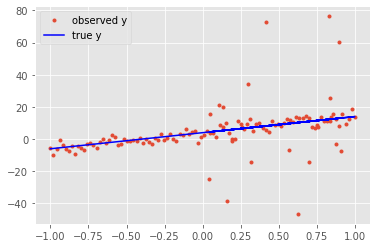

In [ ]:
# Dummy Data used for linear regression
a = 10
b = 4
n = 100
sigma = 3
e1 = sigma * np.random.randn(n) 
x1 = np.linspace(-1, 1, num=n)
y1 = a * x1 + b + e1

# Create outliers to see the robustness of lasso regression
n2 = 20
e2 = sigma * 10 * np.random.randn(n2) 
x2 = np.random.random_sample(size=n2)
y2 = a * x2 + b + e2

# Add two data
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
plt.plot(x, y, '.', label='observed y');
plt.plot(x, a * x + b, 'b', label='true y');
plt.legend();

# 4) sklearn.linear model.ElasticNet

Elastic Net es un modelo de regresión lineal que normaliza el vector de coeficientes con las normas L1 y L2. Esto permite generar un modelo en el que solo algunos de los coeficientes sean no nulos, manteniendo las propiedades de regularización de Ridge. La función de coste es equivalente a:

$${ RSS }_{ elasticnet }=\sum _{ i=1 }^{ n }{ { ({ y }_{ i }-f{ ({ x }_{ i }) }) }^{ 2 } } +\alpha \left( \lambda \sum _{ j=1 }^{ p }{ { { \beta  } }^{ 2 } } +(1-\lambda )\sum _{ j=1 }^{ p }{ { |\beta  }_{ j }| }  \right) $$

El parámetro λ regula el peso dado a la regularización impuesta por Ridge y por Lasso. Desde este punto de vista Elastic Net es un superconjunto de ambos modelos.

En el caso de que exista cierta colinealidad entre varias características predictivas, Elastic Net tenderá a escoger una o todas (aun con coeficientes menores) en función de cómo haya sido parametrizado.



Alpha:0.0001, R2:0.74, MSE:21.90, RMSE:4.68
Alpha:0.0010, R2:0.74, MSE:21.92, RMSE:4.68
Alpha:0.0100, R2:0.74, MSE:22.32, RMSE:4.72
Alpha:0.1000, R2:0.73, MSE:23.16, RMSE:4.81
Alpha:0.3000, R2:0.71, MSE:24.08, RMSE:4.91
Alpha:0.5000, R2:0.71, MSE:24.85, RMSE:4.99
Alpha:0.7000, R2:0.70, MSE:25.55, RMSE:5.05
Alpha:1.0000, R2:0.69, MSE:26.50, RMSE:5.15
0.001
31.057462241688135
R2:0.692, MSE:31.97, RMSE:5.65


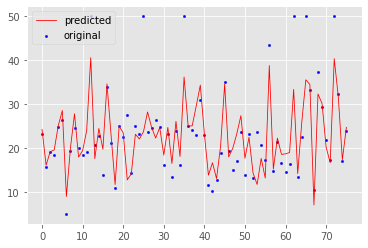

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

# --- ElasticNetCV ----
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# 5) sklearn.kernel ridge.KernelRidge

Tal y como se ha comentado, los vectores correspondientes al bloque de entrenamiento son mapeados a un espacio de mayor dimensionalidad por una cierta función, y este mapeo es responsabilidad de lo que denominamos kernel. Un kernel viene determinado por una matriz cuadrada de dimensión igual al número de muestras siendo analizadas, y el contenido de esta matriz es la resultante de aplicar la función de mapeo al conjunto de entrenamiento.

Scikit-learn ofrece 4 kernels básicos. En las siguientes fórmulas xi y xj representan los valores de la matriz de coeficientes del conjunto de entrenamiento, XT la transpuesta de X, ‖X‖ representa la norma L2 de X, y el punto (.) representa el producto de dos matrices.

### Linear
La función aplicada es:
$$
K\left(x_{i}, x_{j}\right)=x_{i}^{T} \cdot x_{j}
$$
### Polynomial
En el kernel polinómico la función aplicada es:
$$
K\left(x_{i}, x_{j}\right)=\left(\gamma x_{i}^{T} \cdot X_{j}+r\right)^{d}
$$
donde γ viene dada por el parámetro gamma de la función SVC, r por coef0 y d por el parámetro degree.

Radial Basis Function
La función aplicada es:
$$
K\left(x_{i}, x_{j}\right)=e^{-\gamma\left\|x_{i} x_{j}\right\|^{2}}
$$
‖Xi-Xj‖ representa una matriz cuadrada con la distancia euclídea entre cada par de puntos de X. Esta matriz puede conseguirse con la función sklearn.metrics.pairwise.euclidean_distances. Al igual que en el caso del kernel polinómico, γ viene dado por el parámetro gamma de SVC.

### Sigmoid
En este último caso la función aplicada es:
$$
K\left(x_{i}, x_{j}\right)=\tanh \left(\gamma x_{i}^{T} \cdot x_{j}+r\right)
$$
donde γ y r vienen dados por los parámetros gamma y coef0, respectivamente.

SVR complexity and bandwidth selected and model fitted in 0.770 s
KRR complexity and bandwidth selected and model fitted in 0.405 s
Support vector ratio: 0.320
SVR prediction for 100000 inputs in 0.135 s
KRR prediction for 100000 inputs in 0.319 s


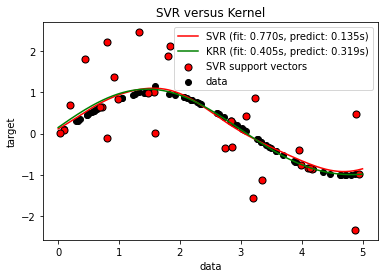

In [1]:
import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))

sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel')
plt.legend()


# El ejercicio 2 de laboratorio fue realizado en la base de datos el cual se envia de forma independiente.